In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Bio import SeqIO
from Bio.Phylo.PhyloXML import Phyloxml
from Bio.Phylo import PhyloXMLIO
from cen_detect_hor.distance import distance_values
from cen_detect_hor.showHOR import show_hor, show_hors, show_hor_tree
from cen_detect_hor.featureUtils import BED_file_to_features, feature_to_seq, remove_overlapping_features
from cen_detect_hor.parallel_distance import build_seqs_distance_matrix_by_chunks, FileSystemChunkStore
from cen_detect_hor.hor_tree import phylogeny_to_hor_tree
from cen_detect_hor.clustering_to_phylogeny import clustering_to_phylogeny
from cen_detect_hor.mixed_direction_hors import find_inversion_loops
from cen_detect_hor.compare_phylogenies import phylogenies_equal

In [2]:
references = {seq.id : seq for seq in SeqIO.parse("data/chr10/PPY17_Verkko_v1.chr10_hap1.fasta", "fasta")}

In [3]:
monomers_as_features = BED_file_to_features("data/chr10/final_decomposition.bed")

In [4]:
monomers_as_features = remove_overlapping_features(
    features=monomers_as_features,
    expected_feature_size=171,
    max_allowed_overlap_fraction=0.25
)

Removed sequence feature chr10_hap1:1-132210704[35405144:35405272](+) overlapping (94 bps) with sequence feature chr10_hap1:1-132210704[35405070:35405238](+).
Kept sequence feature chr10_hap1:1-132210704[77570170:77570333](+) overlapping (30 bps) with sequence feature chr10_hap1:1-132210704[77570016:77570200](-).
Removed sequence feature chr10_hap1:1-132210704[130830138:130830274](+) overlapping (87 bps) with sequence feature chr10_hap1:1-132210704[130830051:130830225](-).


/Users/miguel/git/CENdetectHOR_lib/env/lib/python3.9/site-packages/Bio/SeqFeature.py:260: BiopythonDeprecationWarning: Please use .location.ref rather than .ref
  warnings.warn(


In [5]:
# # sample monomers for testing purposes (comment out for complete analysis)

# sample_size = 20
# num_samples = 5

# sample_page = len(monomers_as_features) // num_samples
# sample_offset = (sample_page - sample_size) // 2

# def slice_seq(seq, position, length):
#     return seq[position : position + length]

# monomers_as_features = [
#     monomer
#     for sample_index in range(num_samples)
#     for monomer in slice_seq(monomers_as_features, sample_index * sample_page + sample_offset, sample_size)
# ]

In [6]:
monomers_as_seqs = [feature_to_seq(feature, references) for feature in monomers_as_features]

In [7]:
monomer_dists = build_seqs_distance_matrix_by_chunks(monomers_as_seqs, num_chunks=32, chunk_store=FileSystemChunkStore("data/chr10/submatrices_32/piece_{row}_{col}"))

# of chunks for computing distance matrix: 32
Chunk size: 26
Num processes: 481
Blocks: ['([0:1](26,26))', '([0:2](26,26))', '([1:2](26,26))', '([0:3](26,26))', '([1:3](26,26))', '([2:3](26,26))', '([0:4](26,26))', '([1:4](26,26))', '([2:4](26,26))', '([3:4](26,26))', '([0:5](26,26))', '([1:5](26,26))', '([2:5](26,26))', '([3:5](26,26))', '([4:5](26,26))', '([0:6](26,26))', '([1:6](26,26))', '([2:6](26,26))', '([3:6](26,26))', '([4:6](26,26))', '([5:6](26,26))', '([0:7](26,26))', '([1:7](26,26))', '([2:7](26,26))', '([3:7](26,26))', '([4:7](26,26))', '([5:7](26,26))', '([6:7](26,26))', '([0:8](26,26))', '([1:8](26,26))', '([2:8](26,26))', '([3:8](26,26))', '([4:8](26,26))', '([5:8](26,26))', '([6:8](26,26))', '([7:8](26,26))', '([0:9](26,26))', '([1:9](26,26))', '([2:9](26,26))', '([3:9](26,26))', '([4:9](26,26))', '([5:9](26,26))', '([6:9](26,26))', '([7:9](26,26))', '([8:9](26,26))', '([0:10](26,26))', '([1:10](26,26))', '([2:10](26,26))', '([3:10](26,26))', '([4:10](26,26))', '([5:1

In [8]:
with open('data/chr10/distances.npy', 'wb') as f:
    np.save(f, monomer_dists)

(array([6.4000e+02, 6.3000e+01, 1.0000e+00, 4.0000e+00, 2.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00,
        2.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00,
        3.0000e+00, 1.9000e+01, 3.7000e+01, 1.1100e+02, 7.3000e+01,
        1.6100e+02, 3.0500e+02, 5.5000e+02, 1.2180e+03, 1.5140e+03,
        2.4320e+03, 3.6500e+03, 4.3670e+03, 6.1860e+03, 7.0560e+03,
        9.1370e+03, 9.6880e+03, 1.1863e+04, 1.2121e+04, 1.2269e+04,
        1.2951e+04, 1.2216e+04, 1.1318e+04, 1.0259e+04, 9.2720e+03,
        8.2400e+03, 6.7550e+03, 5.4760e+03, 4.9800e+03, 4.1420e+03,
        3.3210e+03, 2.9610e+03, 2.5240e+03, 2.3190e+03, 2.2020e+03,
        2.3490e+03, 2.3130e+03, 2.6110e+03, 2.6790e+03, 2.5620e+03,
        2.3540e+03, 2.1900e+03, 1.9450e+03, 1.7140e+03, 1.4970e+03,
        1.3630e+03, 1.1470e+03, 1.0620e+03, 7.9500e+02, 7.7800e+02,
        6.8000e+02, 5.8600e+02, 5.8200e+02, 6.2600e+02, 5.6100e+02,
        5.5200e+02, 4.6900e+02, 5.8000e+02, 5.21

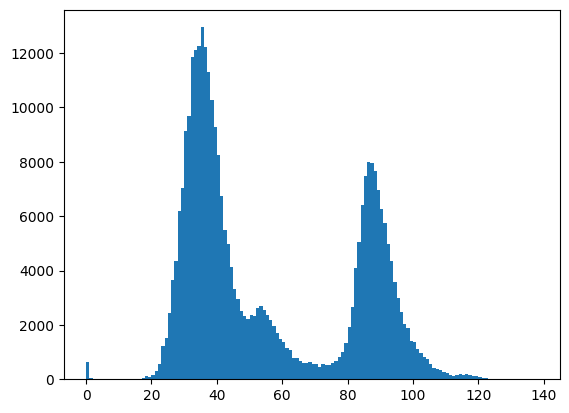

In [9]:
dist_values = distance_values(monomer_dists)
plt.hist(dist_values, bins=int(max(dist_values)))

In [10]:
# plt.matshow(monomer_dists)

In [11]:
phylogeny = clustering_to_phylogeny(
    dist_matrix=monomer_dists,
    items_as_seq_features=monomers_as_features,
    seq_references=references
).phylogeny

In [12]:
phyloXml = Phyloxml(phylogenies=[phylogeny], attributes=None)
PhyloXMLIO.write(phyloXml, 'data/chr10/monomer_phylogeny.xml')

1

In [13]:
hor_tree = phylogeny_to_hor_tree(phylogeny)

/Users/miguel/git/CENdetectHOR_lib/env/lib/python3.9/site-packages/Bio/Phylo/PhyloXML.py:985: PhyloXMLWarning: String monomer_clade_seq doesn't match the given regexp
  _check_str(ref, self.re_ref.match)


In [14]:
inversion_loops = find_inversion_loops(seq_features=monomers_as_features)
[str(loop_inSeq) for loop_inSeq in inversion_loops]

/Users/miguel/git/CENdetectHOR_lib/env/lib/python3.9/site-packages/Bio/SeqFeature.py:231: BiopythonDeprecationWarning: Please use .location.strand rather than .strand
  warnings.warn(


[]

In [15]:
phyloXml = Phyloxml(phylogenies=[hor_tree.as_phyloxml], attributes=None)
PhyloXMLIO.write(phyloXml, 'data/chr10/HORs.xml')

1

In [16]:
phyloXml = Phyloxml(phylogenies=[phylogeny, hor_tree.as_phyloxml], attributes=None)
PhyloXMLIO.write(phyloXml, 'data/chr10/monomer_phylogeny_and_HORs.xml')

2

Subtree: []
None


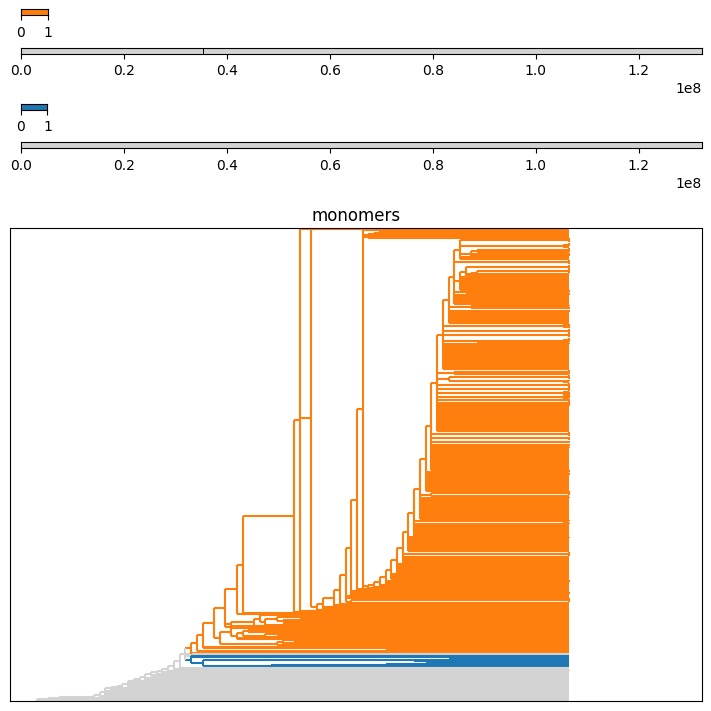

Subtree: [1]
None


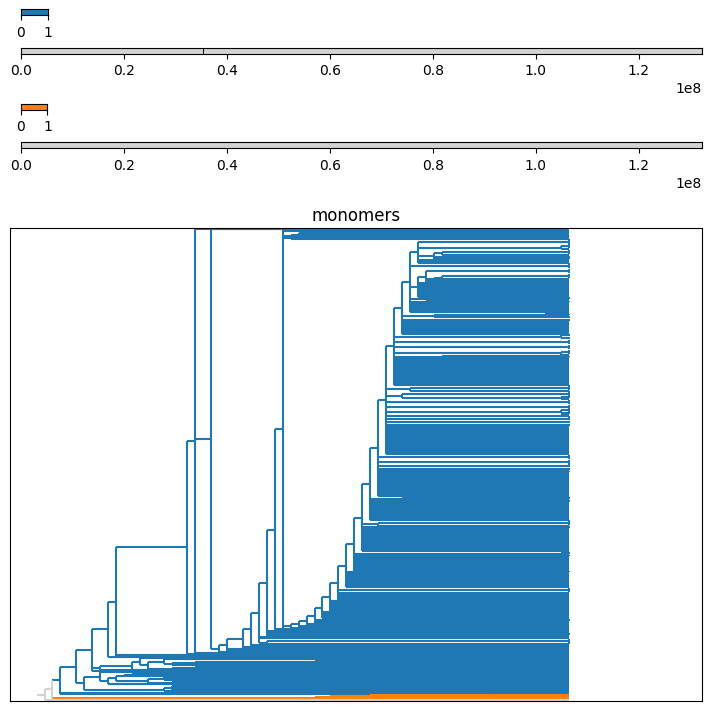

Subtree: [1, 1]
None


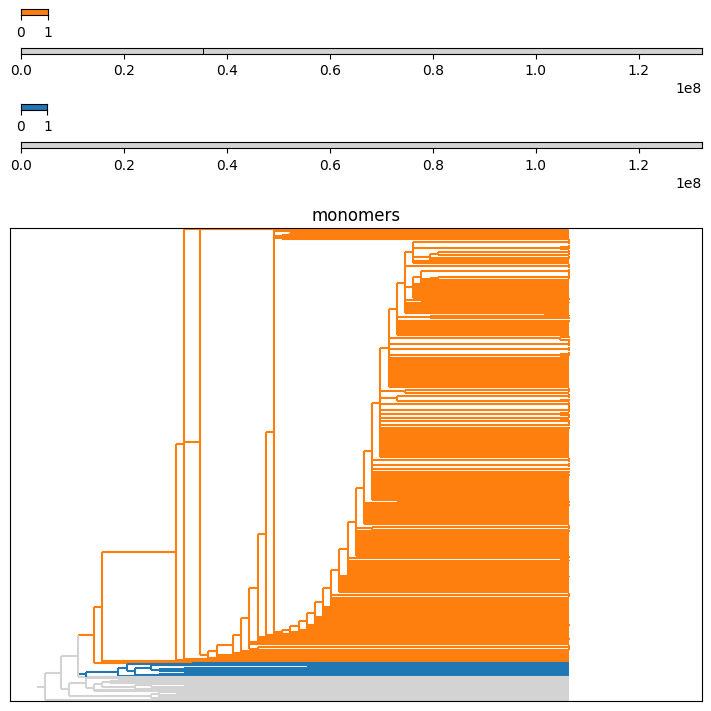

In [17]:
show_hor_tree(hor_tree_root=hor_tree.as_hor_in_seq, reference_seq=references['chr10_hap1:1-132210704'], tree=phylogeny)

In [18]:
hor_tree_discrete = phylogeny_to_hor_tree(phylogeny, min_loops=5, allow_hor_overlap=False, discrete_sorted_levels=True)

In [19]:
phyloXml = Phyloxml(phylogenies=[hor_tree_discrete.as_phyloxml], attributes=None)
PhyloXMLIO.write(phyloXml, './data/chr10/HORs_discrete.xml')

1

Subtree: []
None


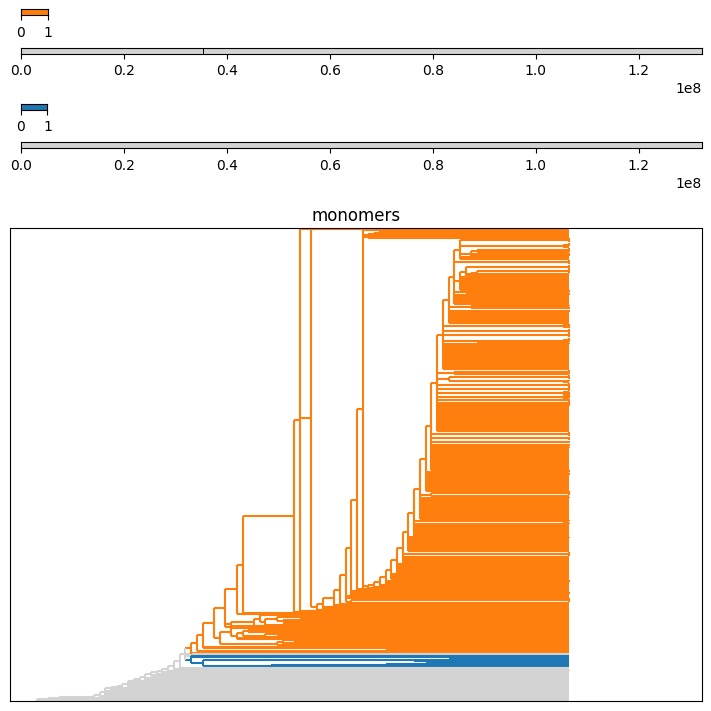

Subtree: [1]
None


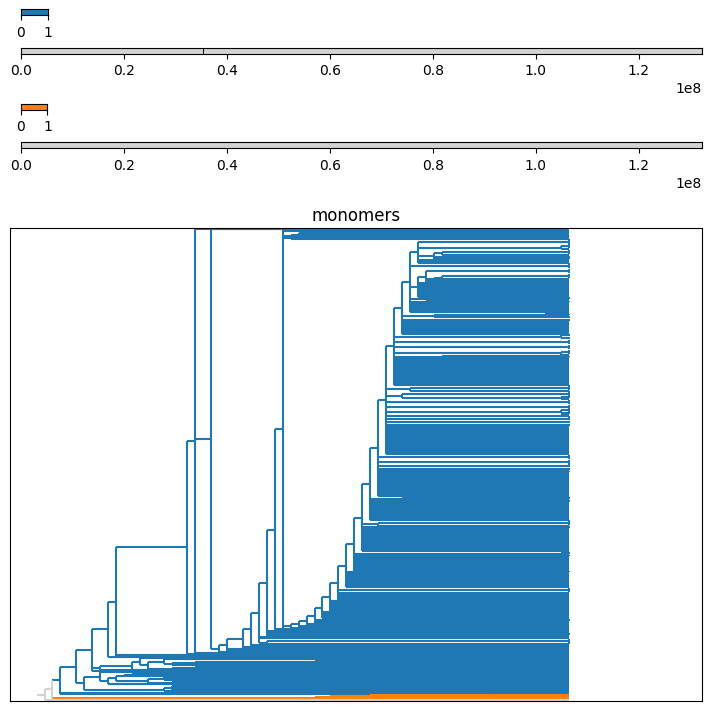

Subtree: [1, 1]
None


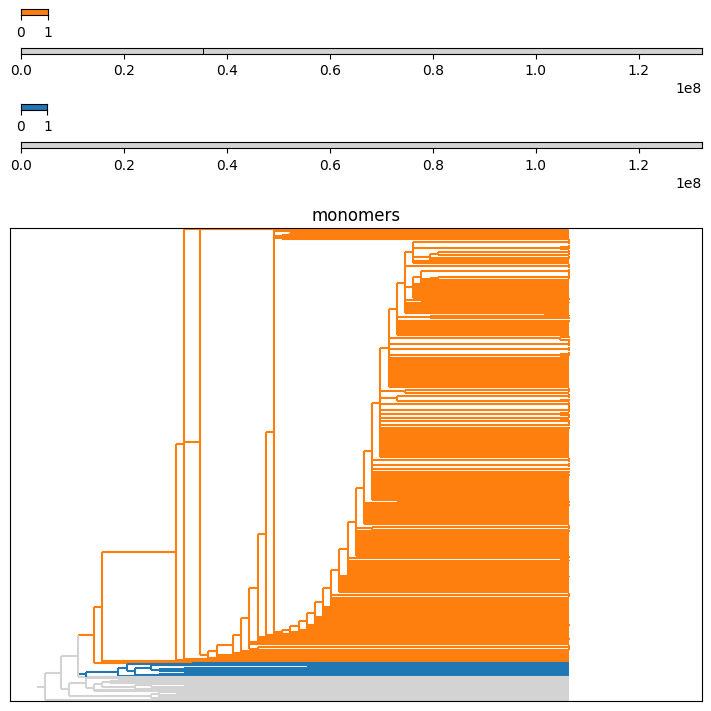

In [20]:
show_hor_tree(hor_tree_root=hor_tree_discrete.as_hor_in_seq, reference_seq=references['chr10_hap1:1-132210704'], tree=phylogeny)

In [21]:
phylogenies_equal(hor_tree.as_phyloxml, hor_tree_discrete.as_phyloxml, check_branch_lengths=False)

True